In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X[:10], y[:10], len(X_train), len(y_train), len(X_test), len(y_test)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 40,
 40,
 10,
 10)

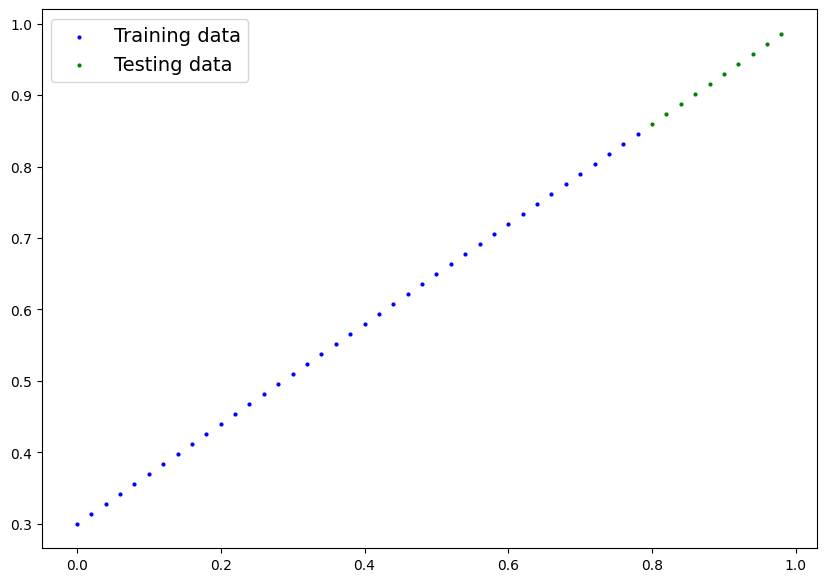

In [3]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  # plt.scatter(X_test, y, c="r", s=4, label="Prediction")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions()

In [4]:
# All Module's Parameters should be random and be updated to be closer
# to the real value
class LinearRegressionModule(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)

    self._Weights = nn.Parameter(data=torch.randn(1,
                            dtype=torch.float), requires_grad=True)
    self._Bias = nn.Parameter(data=torch.randn(1,
                            dtype=torch.float), requires_grad=True)

  # The function that Process the Data
  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return x * self._Weights + self._Bias

In [5]:
torch.manual_seed(42) # Reproducable Random Parameters
_Model = LinearRegressionModule()

print(_Model.state_dict())

OrderedDict([('_Weights', tensor([0.3367])), ('_Bias', tensor([0.1288]))])


In [6]:
# Loss and Optim funcs
Loss_Fn = nn.L1Loss()

_Optimizer = torch.optim.SGD(params=_Model.parameters(), lr=0.001)

Epoch: 0 | MAE Train Loss: 0.02435956709086895 | MAE Test Loss: 0.05690721794962883 
Epoch: 10 | MAE Train Loss: 0.024016480892896652 | MAE Test Loss: 0.05607985332608223 
Epoch: 20 | MAE Train Loss: 0.02367258258163929 | MAE Test Loss: 0.055252473801374435 
Epoch: 30 | MAE Train Loss: 0.023329313844442368 | MAE Test Loss: 0.054493773728609085 
Epoch: 40 | MAE Train Loss: 0.022986043244600296 | MAE Test Loss: 0.05366641283035278 
Epoch: 50 | MAE Train Loss: 0.022642139345407486 | MAE Test Loss: 0.05283904820680618 
Epoch: 60 | MAE Train Loss: 0.02229905314743519 | MAE Test Loss: 0.05208033323287964 
Epoch: 70 | MAE Train Loss: 0.02195560745894909 | MAE Test Loss: 0.05125296115875244 
Epoch: 80 | MAE Train Loss: 0.021611705422401428 | MAE Test Loss: 0.05042559653520584 
Epoch: 90 | MAE Train Loss: 0.021268798038363457 | MAE Test Loss: 0.0496668815612793 
Epoch: 100 | MAE Train Loss: 0.02092517353594303 | MAE Test Loss: 0.0488395169377327 
Epoch: 110 | MAE Train Loss: 0.02058140188455581

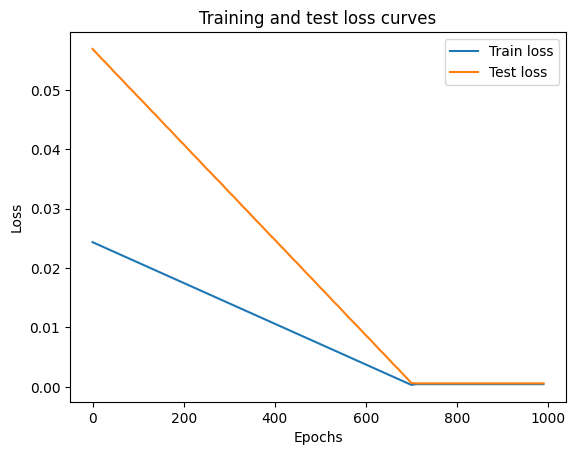

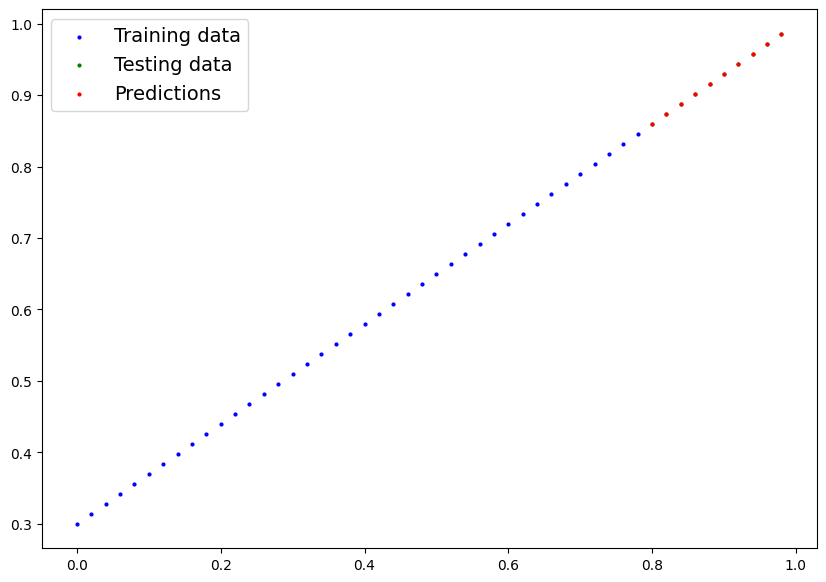

In [8]:
_Epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for i in range(_Epochs):
  # Set to Train Mode
  _Model.train()

  # Get Prediction
  y_pred = _Model(X_train)

  # Compare y_pred with y_train to know the loss
  loss = Loss_Fn(y_pred, y_train)

  # Remove the Previous Gradeints values
  _Optimizer.zero_grad()

  # Do Gradeint calculation to update the Weights and Bias
  loss.backward()

  # Update the Weights and Bias
  _Optimizer.step()

  # Set Model to Eval mode
  _Model.eval()

  # To not update the Gradient
  with torch.inference_mode():

    # 1. Forward pass on test data
    test_pred = _Model(X_test)

    # 2. Caculate loss on test data
    test_loss = Loss_Fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

    # Print out what's happening
    if i % 10 == 0:
          epoch_count.append(i)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {i} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# 1. Set the model in evaluation mode
_Model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = _Model(X_test)
plot_predictions(predictions=y_preds)


In [15]:
Model_Name = "LinearLineModel.pth"
Model_Save_Path = "Model/" + Model_Name

# 3. Save the model state dict
print(f"Saving model to: {Model_Save_Path}")
torch.save(obj=_Model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=Model_Save_Path)

Saving model to: Model/LinearLineModel.pth


In [16]:
!ls -l Model/

total 4
-rw-r--r-- 1 root root 1544 Nov  8 02:33 LinearLineModel.pth


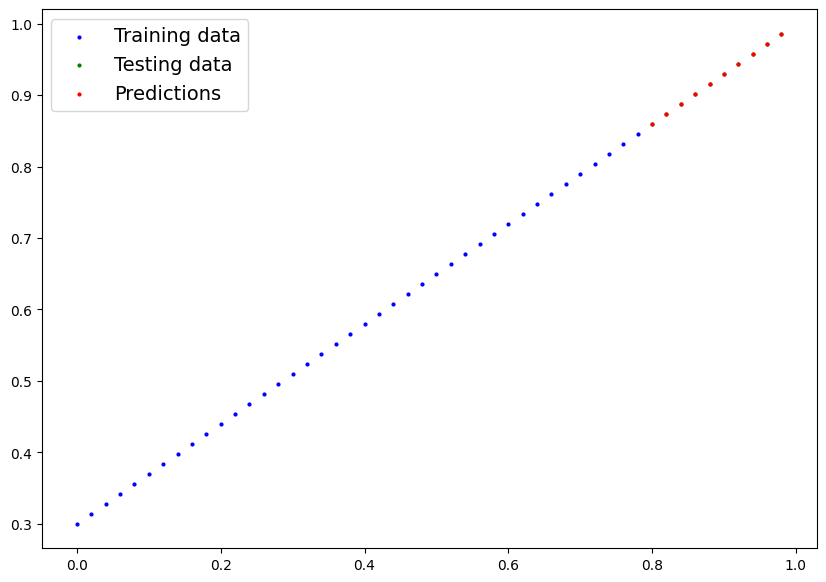

In [17]:
NewModel = LinearRegressionModule()

NewModel.load_state_dict(torch.load(f=Model_Save_Path))


# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = NewModel(X_test)
plot_predictions(predictions=y_preds)